In [1]:
import os
print(os.getcwd())

/mnt/c/Users/User/Documents/Python_Scripts/Automatic_Streaming_Highlights


In [2]:
import matplotlib.pyplot as plt

In [3]:
import time

In [6]:
import os
os.chdir("/mnt/c/Users/User/Videos/VODs/Fall_Guys/Streaming2GottaGoFast") #Path of video directory
curDir = os.getcwd()
print(curDir)

/mnt/c/Users/User/Videos/VODs/Fall_Guys/Streaming2GottaGoFast


In [7]:
!ls

streaming2p1.mp4  streaming2p2.mp4  streaming2p3.mp4


In [8]:
def showTimeGraph(x1,y1,title): 
    fig, ax = plt.subplots() # Create a figure and an axes.
    ax.plot(x1,y1) # Plot some data on the axes.

    ax.set(xlabel='Time (seconds)', ylabel='Volume',
        title=title)
    ax.grid()
    #ax.legend()  # Add a legend.

    fig.savefig("volumesPlot.png")
    plt.show()
    return 1

In [9]:
import numpy as np # for numerical operations
from moviepy.editor import VideoFileClip, concatenate

start = time.time()

clip = VideoFileClip("streaming2p1.mp4")
cut = lambda i: clip.audio.subclip(i,i+1).to_soundarray(fps=22000)
volume = lambda array: np.sqrt(((1.0*array)**2).mean())
volumes = [volume(cut(i)) for i in range(0,int(clip.duration-1))]

end = time.time()
print(end - start)

13.428817510604858


In [10]:
print(len(volumes))

a_list = list(range(0, len(volumes)))

#print(a_list)

7034


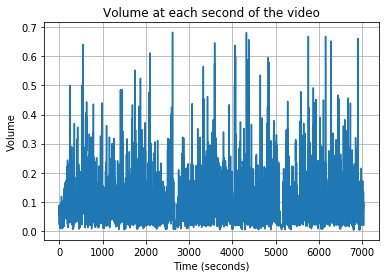

1

In [13]:
showTimeGraph(a_list, volumes, 'Volume at each second of the video')

In [14]:
averaged_volumes = np.array([sum(volumes[i:i+10])/10
                             for i in range(len(volumes)-10)])

In [15]:
a_list = list(range(0, len(volumes)-10))

In [16]:
print(len(a_list))

7024


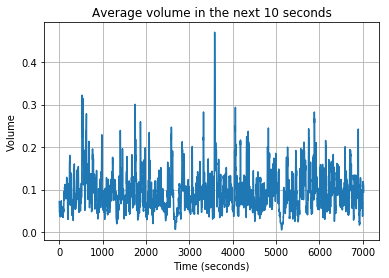

1

In [17]:
showTimeGraph(a_list, averaged_volumes, 'Average volume in the next 10 seconds')

In [18]:
increases = np.diff(averaged_volumes)[:-1]>=0
decreases = np.diff(averaged_volumes)[1:]<=0
peaks_times = (increases * decreases).nonzero()[0]
peaks_vols = averaged_volumes[peaks_times]
peaks_times = peaks_times[peaks_vols>np.percentile(peaks_vols,90)]

In [19]:
final_times=[peaks_times[0]]
for t in peaks_times:
    if (t - final_times[-1]) < 60:
        if averaged_volumes[t] > averaged_volumes[final_times[-1]]:
            final_times[-1] = t
    else:
        final_times.append(t)

In [20]:
print(final_times)

[240, 527, 625, 685, 766, 980, 1229, 1407, 1559, 1671, 1746, 1872, 1982, 2074, 2587, 2835, 3067, 3327, 3435, 3584, 3676, 4059, 4180, 4358, 4824, 4994, 5242, 5458, 5575, 5650, 5753, 5884, 6146, 6321, 6593, 6719, 6898]


In [21]:
start = time.time()
final = concatenate([clip.subclip(max(t-5,0),min(t+5, clip.duration))
                     for t in final_times])
final.to_videofile('streaming2p1_cuts.mp4') # low quality is the default
end = time.time()
print("Time of the algorithm: ")
print(end - start)

[MoviePy] >>>> Building video streaming2p1_cuts.mp4
[MoviePy] Writing audio in streaming2p1_cutsTEMP_MPY_wvf_snd.mp3


100%|██████████| 8159/8159 [00:10<00:00, 741.99it/s]

[MoviePy] Done.
[MoviePy] Writing video streaming2p1_cuts.mp4



100%|█████████▉| 11100/11101 [01:25<00:00, 129.84it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: streaming2p1_cuts.mp4 

Time of the algorithm: 
106.30471563339233
